# Preprocessing, Cleaning, and Data Analysis 

In [1]:
#importing pandas and numpy for preprocessing
import pandas as pd
import numpy as np

In [2]:
#loading the dataset onto a dataframe and viewing
df=pd.read_csv('hypertension_data.csv')
print(df.head)

<bound method NDFrame.head of        age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0       57  1.0   3       145   233    1        0      150      0      2.3   
1       64  0.0   2       130   250    0        1      187      0      3.5   
2       52  1.0   1       130   204    0        0      172      0      1.4   
3       56  0.0   1       120   236    0        1      178      0      0.8   
4       66  0.0   0       120   354    0        1      163      1      0.6   
...    ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
26078   72  0.0   0       138   294    1        1      106      0      1.9   
26079   60  1.0   0       144   200    0        0      126      1      0.9   
26080   68  1.0   0       100   234    0        1      156      0      0.1   
26081   67  1.0   1       154   232    0        0      164      0      0.0   
26082   67  0.0   1       130   236    0        0      174      0      0.0   

       slope  ca  thal  target  


In [3]:
#examine target value
print(df['target'].value_counts())

1    14274
0    11809
Name: target, dtype: int64


In [4]:
#assigning dependent and independent variables
x=df.drop('target',1)
y=df.target
#view x 
print(x.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   57  1.0   3       145   233    1        0      150      0      2.3      0   
1   64  0.0   2       130   250    0        1      187      0      3.5      0   
2   52  1.0   1       130   204    0        0      172      0      1.4      2   
3   56  0.0   1       120   236    0        1      178      0      0.8      2   
4   66  0.0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2  


In [5]:
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64


All the features in the dataset are numerical so there is no need for encoding the data. Encoding would be done on categorical data such as Gender denoted as Male and Female. Here, all caategorical data is denoted using values. This is the list of the categories for various features and their corresponding values:
Sex: 1:(Male); 0:(female)
cp/chest pain: 0: asymptomatic; 1: typical angina; 2: atypical angina; 3: non-anginal pain
fbs: if the patient's fasting blood sugar > 120 mg/dl (1: yes; 0: no)
restecg: Resting ECG results: 0: normal 1: ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 2: probable or definite left ventricular hypertrophy by Estes' criteria
exang: Exercise induced angina (1: yes; 0: no)
slope: The slope of the peak exercise ST segment: 0: upsloping 1: flat 2: downsloping
ca: Number of major vessels (0–3) colored by flourosopy
thal: 1: Normal; 2: Fixed defect; 3: Reversable defect
target: Whether the patient has hypertension (1) or not (0)

In [6]:
#check if data has missing values
x.isnull().sum().sort_values(ascending=False).head(20)

sex         25
thal         0
ca           0
slope        0
oldpeak      0
exang        0
thalach      0
restecg      0
fbs          0
chol         0
trestbps     0
cp           0
age          0
dtype: int64

In [7]:
#there are missing variables for one of the features. Using an imputer can remedy this without data loss
#importing the SimpleImputer from the sklearn library to make up missing data
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(x)
x=pd.DataFrame(data=imp.transform(x),columns=x.columns)

In [8]:
#check again for missing values
x.isnull().sum().sort_values(ascending=False).head(20)

thal        0
ca          0
slope       0
oldpeak     0
exang       0
thalach     0
restecg     0
fbs         0
chol        0
trestbps    0
cp          0
sex         0
age         0
dtype: int64

In [9]:
#Use histograms to look at the distribution of the various features using matplotlib
import matplotlib.pyplot as plt
def feature_histogram(x):
    plt.hist(x, color='blue', alpha=0.5)
    plt.title("'{var_name}'".format(var_name=x.name))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [10]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

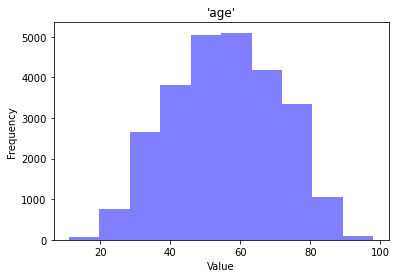

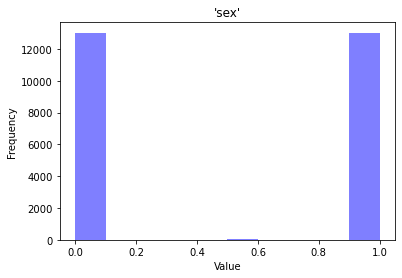

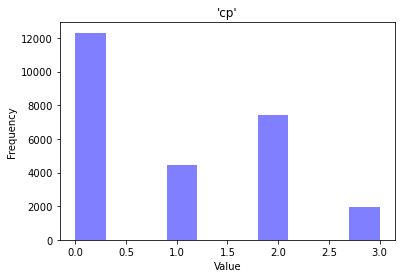

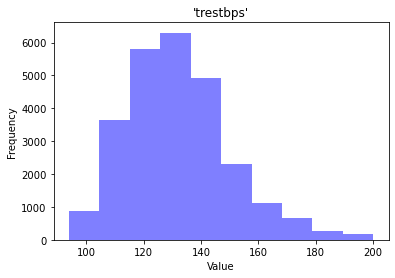

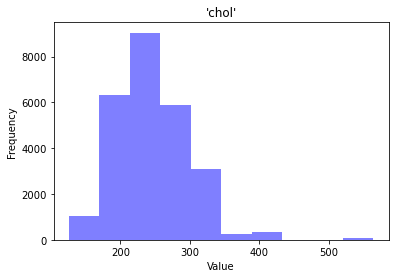

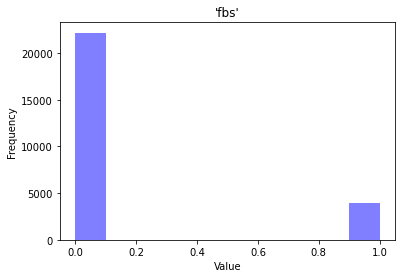

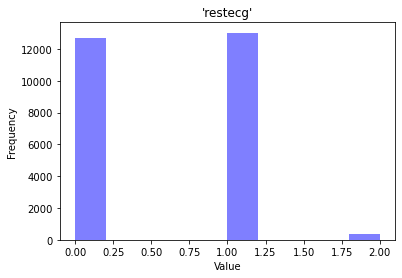

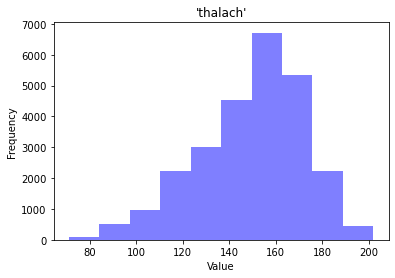

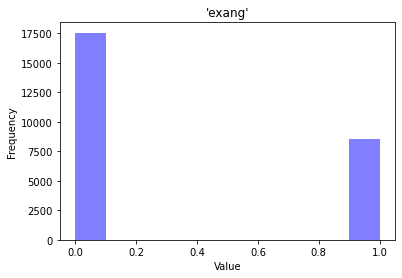

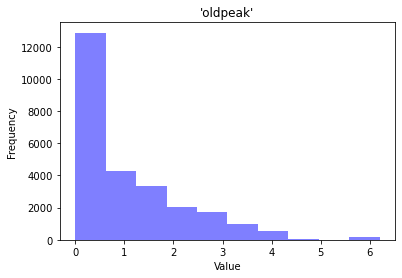

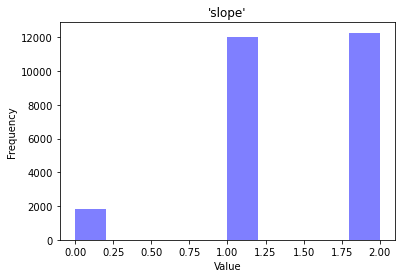

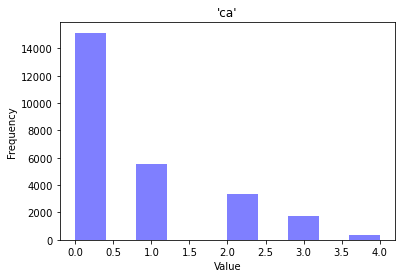

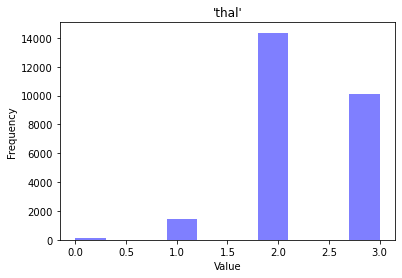

In [11]:
columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'] 
for i in columns:
    feature_histogram(x[i])

In [12]:
#function for plotting a historgram to show relation with target feature
def target_feature_histogram(x,y):
    plt.hist(list(x[y==0]),alpha=0.5, label='no hypertension=0')
    plt.hist(list(x[y==1]),alpha=0.5, label='hypertension=1')
    plt.title("'{var_name}'in relation to hypertension presence".format(var_name=x.name))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend(loc="upper right")
    plt.show()

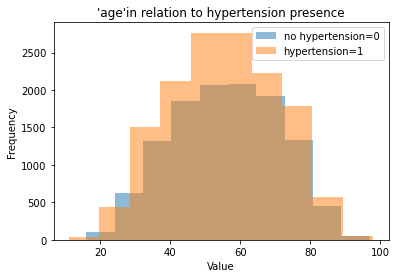

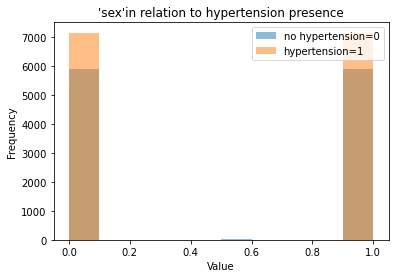

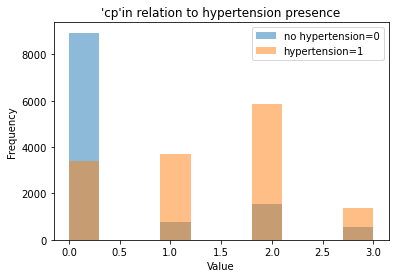

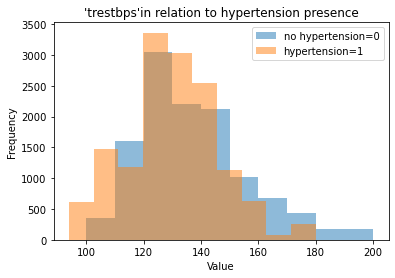

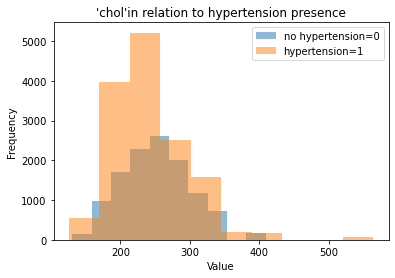

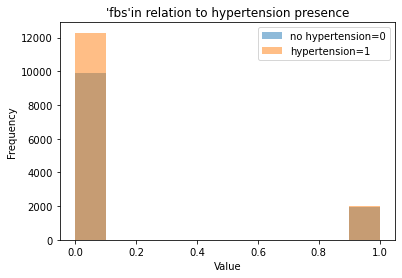

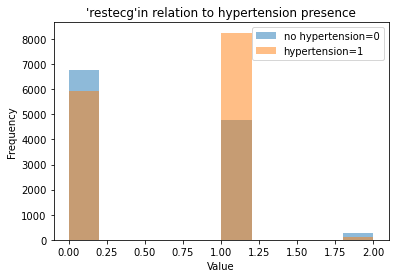

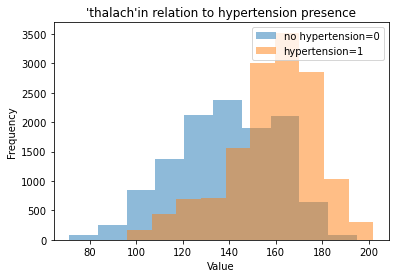

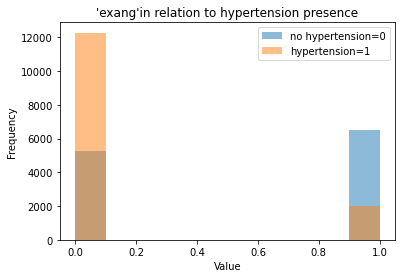

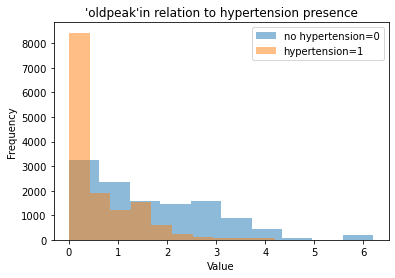

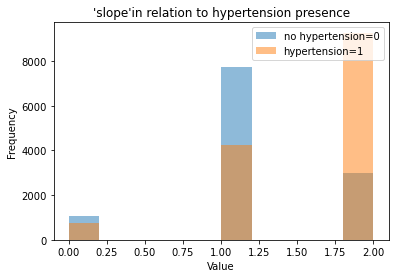

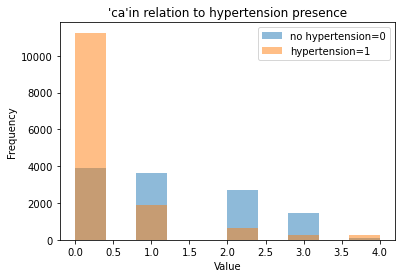

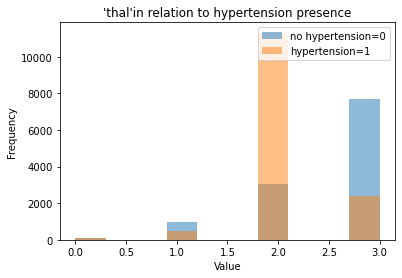

In [13]:
for i in columns:
    target_feature_histogram(x[i],y)

# Building Models

In [14]:
#before training and testing the models the dataset needs to be split into train and test samples
#sklearn library has a function that accomplishes this efficiently
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18258, 13) (7825, 13) (18258,) (7825,)


In [15]:
#feature scaling helps improve results in models like logistic regression
#fit_transform is only used on train sets to prevent models from learning from the test set
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [17]:
 #function to streamline the model display and performace results since all classification models have the same metrics
from sklearn.metrics import accuracy_score , recall_score, precision_score,f1_score, roc_curve,auc,confusion_matrix, ConfusionMatrixDisplay
def model_summary(model):
    #train the model
    model.fit(x_train,y_train)
    #predict the test set results
    y_predict=model.predict(x_test)
    #calculate performance metrics
    print("Accuracy : ", accuracy_score(y_test, y_predict))
    print("Recall : ",recall_score(y_test, y_predict))
    print("Precision: ", precision_score(y_test, y_predict,))
    print("F1-score: ", f1_score(y_test, y_predict))
    #display confusion matrix
    model_confusion_matrix=confusion_matrix(y_test,y_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=model_confusion_matrix ,display_labels=["No hypertension","Hypertensive"])
    disp.plot(cmap=plt.cm.Greys)
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()
    y_pred_prob=model.predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
# get area under the curve
    roc_auc = auc(fpr, tpr)
    print ("Area Under Curve: ",roc_auc)
# Diplay ROC graph
    plt.plot(fpr, tpr, color='red')
    plt.title('ROC Curve ')
    plt.xlabel('False Positive Rate (Type 1 error)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.show()

In [18]:
#creating an object of the logisticRegression class to start training the model
from sklearn.linear_model import LogisticRegression
lgclassifier=LogisticRegression(random_state=0)

Accuracy :  0.8577635782747604
Recall :  0.9273107292150488
Precision:  0.8330899228040893
F1-score:  0.8776788658094297


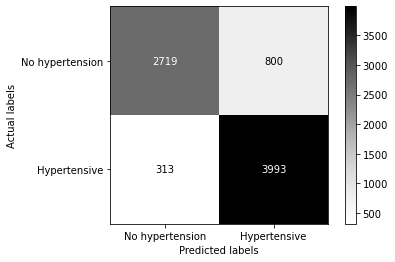

Area Under Curve:  0.9078683338949451


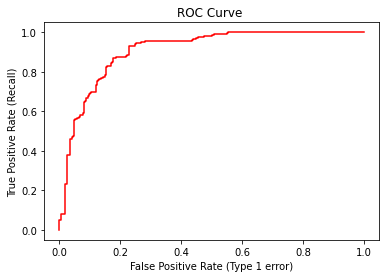

In [19]:
model_summary(lgclassifier.fit(x_train,y_train))

In [20]:
# tune model
#Using k folds and grid search to find the best hyper parameters
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
tunedlg=LogisticRegression(random_state=0)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2', 'l1', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=tunedlg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y) 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.861046 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.860880 (0.006323) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.845545 (0.006672) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.860893 (0.006325) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.860880 (0.006323) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.860880 (0.006323) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.845557 (0.005990) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.860778 (0.006451) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Comparing the accuracy found by grid search and the accuracy originally computed, 0.861 and 0.875 it can be seen that there is not much difference when changing the hyperparameters. This would indicate that focusing on tuning the logistic regression model may not be the best approach for this problem and another classification model is more suitable. This is expected since by nature Logistic Regression does not have many options for hyperparameter tuning and it usually ineffective. 

# Decision Trees for Classification

Accuracy :  1.0
Recall :  1.0
Precision:  1.0
F1-score:  1.0


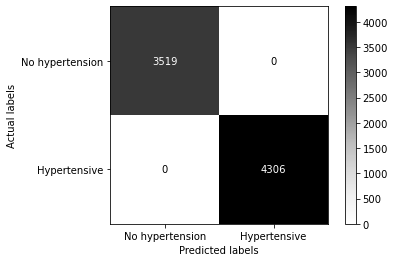

Area Under Curve:  1.0


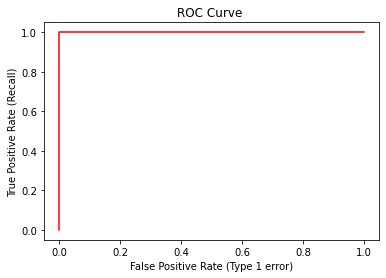

In [21]:
#importing decision tree classifier from sklearn and running summary function
#Trying hyperparameters
from sklearn.tree import DecisionTreeClassifier
dtclassifier=DecisionTreeClassifier(criterion='entropy',min_samples_split=2,random_state=0)
model_summary(dtclassifier.fit(x_train,y_train))

The model here achievied a hundred percent accuracy, which is unusual. This would be a sign of overfitting if it performed well on the training set, but poorly on the test set. This is not the case, however, since the model performed well on the test set.

# Random Forest Classifier

Accuracy :  1.0
Recall :  1.0
Precision:  1.0
F1-score:  1.0


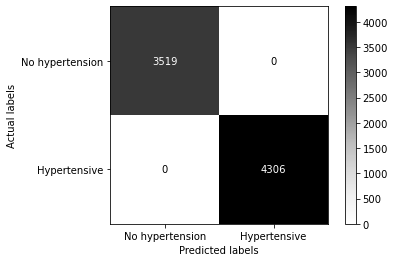

Area Under Curve:  1.0


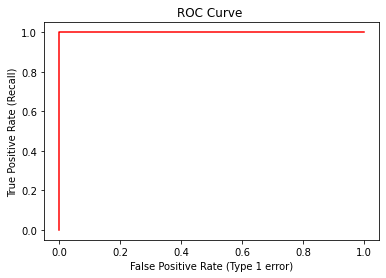

In [22]:
#importing the classifier from sklearn and picking initial hyperparameters
#I tried similar parameters to the decision tree classifier
from sklearn.ensemble import RandomForestClassifier
rfclassifier=RandomForestClassifier(n_estimators=10,criterion='entropy',min_samples_split=2,random_state=0)
model_summary(rfclassifier.fit(x_train,y_train))

The random forest classifier also performed well, which made me think that there may be an issue with the data being passed though the function, but upon testing different hyperparameters, the metrics do change so there does not seem to be an issue.

# Support Vector Machines

Accuracy :  0.9828753993610224
Recall :  0.9946586158848119
Precision:  0.9747382794720073
F1-score:  0.9845977011494254


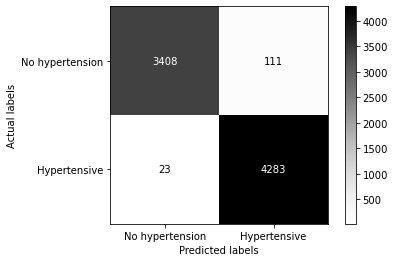

Area Under Curve:  0.9997181381623242


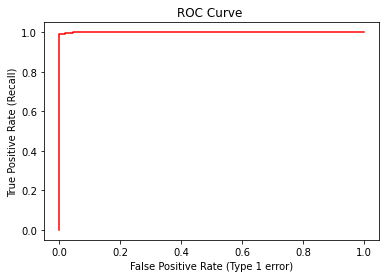

In [24]:
#importing an SVC and creating the object
from sklearn.svm import SVC
svmclassifier=SVC(probability=True)
model_summary(svmclassifier.fit(x_train,y_train))